In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=data.iloc[:,[3,4]].values

In [4]:
from sklearn.cluster import AffinityPropagation
af =AffinityPropagation(max_iter=1000,affinity="euclidean",random_state=50)
af .fit(x)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)

In [5]:
cluster_centers_indices

array([ 22,  25,  26,  58,  95, 121, 144, 149, 159, 189, 190], dtype=int64)

In [6]:
n_clusters_

11

In [7]:
y=af.predict(x)
y

array([ 2,  1,  0,  1,  2,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  2,
        1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  3,  2,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  2,  1,  2,  1,  2,  3,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  4,  5,  5,  4,  4,  4,  5,  4,  5,  4,
        4,  4,  4,  5,  4,  4,  5,  4,  4,  4,  5,  5,  4,  4,  5,  4,  5,
        4,  4,  5,  4,  7,  5,  8,  5,  7,  6,  8,  6,  8,  5,  8,  6,  7,
        6,  8,  6,  8,  6,  7,  5,  7,  6,  7,  5,  8,  6,  7,  6,  7,  6,
        8,  6,  7,  6,  8,  6,  8,  5,  7,  6,  7,  6,  8,  6,  7, 10,  8,
        6,  8,  6,  7,  6,  7,  6,  8, 10,  9, 10,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9], dtype=int64)

In [8]:
superivsed=pd.DataFrame(data)
superivsed["Group_cluster"]=y
superivsed

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group_cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


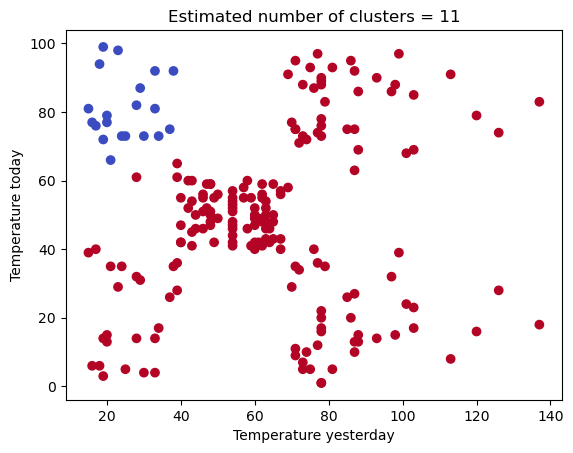

In [9]:
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', y))
plt.scatter(x[:,0], x[:,1], c=colors, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('Temperature yesterday')
plt.ylabel('Temperature today')
plt.show()